In [3]:
import visual_behavior.database as db
from visual_behavior.data_access import loading
import seaborn as sns

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_api/behavior_ophys_nwb_api.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
cache = loading.get_visual_behavior_cache()
behavior_session_table = cache.get_behavior_session_table()

In [13]:
len(behavior_session_table.index)

10187

In [36]:
conn = db.Database('visual_behavior_data')
collection = conn['behavior_analysis']['running_data_summary']
df = pd.DataFrame(list(collection.find({}))).query('std < 2.5')
conn.close()
len(df)

9948

In [37]:
df[
    df['equipment_name']=="CAM2P.4"
][['std','behavior_session_id']]

,std,behavior_session_id
1,0.384414,867036297
4,0.953701,883696092
10,1.603885,822447169
11,0.995524,868743660
27,1.213466,968564134
...,...,...
9849,1.786070,817925173
9855,1.973172,888301437
9859,0.353384,777200179
9881,0.651537,994882261


(array([0.20512821, 0.44042232, 1.57968829, 1.86023127, 1.13826043,
        0.75314228, 0.71191554, 0.68476621, 0.58622423, 0.50276521,
        0.44746104, 0.33081951, 0.22926094, 0.13373555, 0.11664153,
        0.0693816 , 0.0563097 , 0.04725993, 0.02916038, 0.02513826,
        0.01709402, 0.02212167, 0.0100553 , 0.00301659]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4]),
 <a list of 24 Patch objects>)

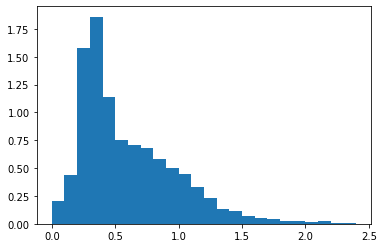

In [38]:
fig,ax=plt.subplots()
ax.hist(df['std'],bins=np.arange(0,2.5,0.1),density=True)
# ax.hist(df.query('equipment_name == "CAM2P.4"')['std'],bins=np.arange(0,2.5,0.1),density=True,alpha=0.5)

In [39]:
df.groupby('equipment_name')['std'].median().sort_values()

equipment_name
BEH.D      0.278380
WF.1       0.288426
BEH.G      0.350271
BEH.E      0.397137
BEH.F      0.427715
NP.1       0.468448
BEH.B      0.468833
MESO.1     0.540074
NP.0       0.640234
CAM2P.3    0.721267
NP.3       0.725210
CAM2P.5    0.911803
CAM2P.4    1.185307
Name: std, dtype: float64

In [40]:
order = df.groupby('equipment_name')['std'].median().sort_values().index

Text(0.5, 0, 'std of signal noisiness distribution')

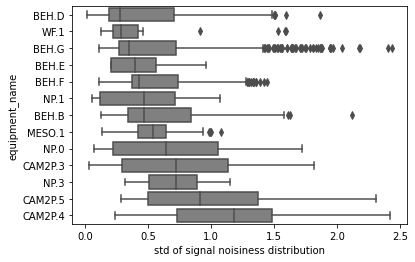

In [41]:
ax = sns.boxplot(
    data = df,
    x='std',
    y='equipment_name',
    order = order,
    color='gray'
)
ax.set_xlabel('std of signal noisiness distribution')

Text(0.5, 0, 'std of signal noisiness distribution')

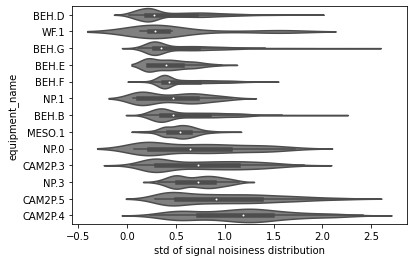

In [42]:
ax = sns.violinplot(
    data = df,
    x='std',
    y='equipment_name',
    order = order,
    color='gray',
    scale = 'width'
)
ax.set_xlabel('std of signal noisiness distribution')